<a href="https://colab.research.google.com/github/patsicko/linear-regression-model/blob/master/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING


In [5]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.datasets import make_regression




# **1. Dataset**

In [6]:
x,y=make_regression(n_samples=100, n_features=1,noise=10)

print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [9]:
y=y.reshape(y.shape[0],1)
y.shape

(100, 1)

## **X=m x (n+1)**   

**m=samples
n=features**

# **Y=m x 1**

# **theta=(n+1) x 1**

In [11]:
X=np.hstack((x,np.ones(x.shape)))
X.shape

(100, 2)

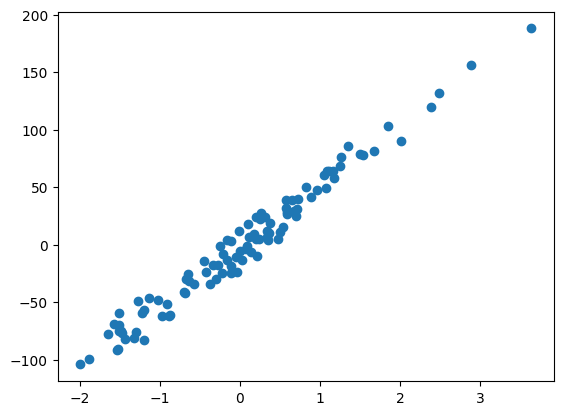

In [13]:
plt.scatter(x,y)
plt.show()

In [15]:
theta=np.random.rand(2,1)
theta

array([[0.69258872],
       [0.06604454]])

# **Model**

# y=X.theta

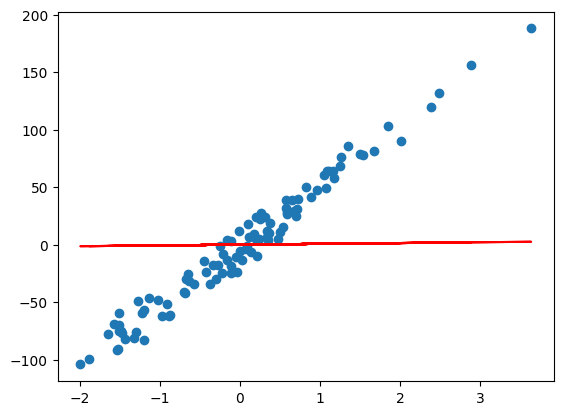

In [56]:
def model(X,theta):
  return X.dot(theta)

plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r')


# **Loss function**

# **J(theta)=(1/2m).sum(X.theta-Y)**2

In [60]:
def costfunction(X,y,theta):
  m=len(y)
  return 1/(2*m)*np.sum((model(X,theta)-y)**2)

costfunction(X,y,theta)

1608.26287756699

# **GRADIENT**

# **dJ(theta)/dtheta=(1/m)X.T(X.theta-y)**

In [61]:
def grad(X,theta,y):
  m=len(y)
  return (1/m)*X.T.dot(model(X,theta)-y)
grad(X,theta,y)

array([[-60.6566649 ],
       [ -0.73525036]])

# **GRADIENT DESCENT**

# **theta=theta-alpha*grad(X,theta,y)**

In [90]:
def descgrad(X,theta,y,learningrate,iteration):
  cost_history=np.zeros(iteration)


  for i in range(0,iteration):
    theta=theta-learningrate*grad(X,theta,y)
    cost_history[i]=costfunction(X,y,theta)
  return theta,cost_history

thetaFinal,cost_history=descgrad(X,theta,y,learningrate=0.01,iteration=1000)
thetaFinal


array([[52.19479066],
       [-1.74428505]])

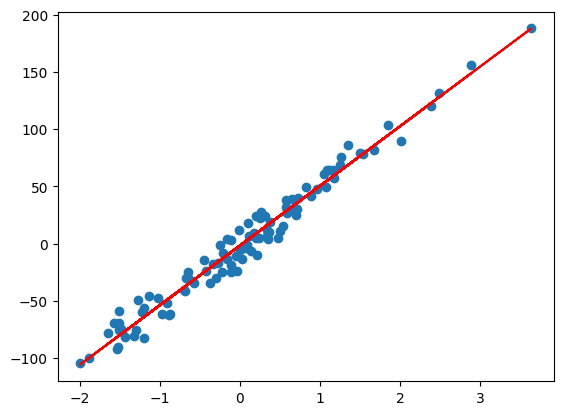

In [91]:
plt.scatter(x,y)

plt.plot(x,model(X,thetaFinal),c='r')
plt.show()

In [88]:
costfunction(X,y,thetaFinal)

46.938338219866466

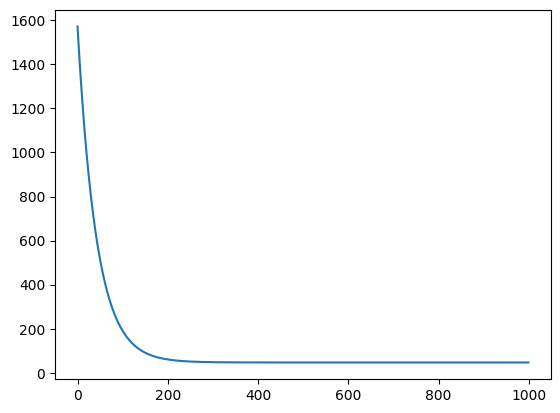

In [92]:
plt.plot(range(1000),cost_history)

# **Coefficient de determination R2**

# R2=1-(sum(y-f(x))**2)/sum(y-y.mean())**2



---



In [93]:
def coef_determination(y,pred):
  u=((y-pred)**2).sum()
  v=((y-y.mean())**2).sum()
  return 1-u/v

In [95]:
pred=model(X,thetaFinal)

In [96]:
coef_determination(y,pred)

0.9715570010427005